<a href="https://colab.research.google.com/github/ciccmeek/Michael-Ciccarelli-FNCE-Python/blob/main/Hollywood_Box_Office_Analysis_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎬 Predicting Hollywood Box Office Trends (1995–2021)
## A Data Science Project Using Kaggle's Hollywood Theatrical Market Dataset
### Authors: Michael Ciccarelli, Kevin Anglim, Jack McNerney

**Objective**: Analyze trends in the Hollywood movie industry and build a model to predict box office revenue or ticket sales using historical data.

**Dataset Source**: [Kaggle - Hollywood Theatrical Market Synopsis](https://www.kaggle.com/datasets/johnharshith/hollywood-theatrical-market-synopsis-1
95-to-2021)

We'll apply EDA, linear regression modeling, and Fama-French-style 'risk vs return' genre analysis.


In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"michaelciccarelli","key":"40e744ccf6c702f9ae1cb25fab364d7d"}'}

In [8]:
import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d johnharshith/hollywood-theatrical-market-synopsis-1995-to-2021

Dataset URL: https://www.kaggle.com/datasets/johnharshith/hollywood-theatrical-market-synopsis-1995-to-2021
License(s): CC-BY-NC-SA-4.0


In [10]:
!unzip hollywood-theatrical-market-synopsis-1995-to-2021.zip

Archive:  hollywood-theatrical-market-synopsis-1995-to-2021.zip
  inflating: AnnualTicketSales.csv   
  inflating: HighestGrossers.csv     
  inflating: PopularCreativeTypes.csv  
  inflating: TopDistributors.csv     
  inflating: TopGenres.csv           
  inflating: TopGrossingRatings.csv  
  inflating: TopGrossingSources.csv  
  inflating: TopProductionMethods.csv  
  inflating: WideReleasesCount.csv   


In [11]:
import pandas as pd

annual_sales = pd.read_csv("AnnualTicketSales.csv")
highest_grossers = pd.read_csv("HighestGrossers.csv")

annual_sales.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Unnamed: 5
0,2021,"42,37,74,881","$3,881,777,912","$3,881,777,912",$9.16,NaN
1,2020,"22,36,38,958","$2,048,534,616","$2,048,534,616",$9.16,NaN
2,2019,"1,22,85,41,629","$11,253,443,955","$11,253,444,050",$9.16,NaN
3,2018,"1,31,15,36,128","$11,948,096,650","$12,013,670,952",$9.11,NaN
4,2017,"1,22,56,39,761","$10,993,991,460","$11,226,860,216",$8.97,NaN


In [12]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
sns.set(style='whitegrid')

In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("johnharshith/hollywood-theatrical-market-synopsis-1995-to-2021")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/hollywood-theatrical-market-synopsis-1995-to-2021


In [14]:
# Load Data
annual_sales = pd.read_csv('AnnualTicketSales.csv')
top_genres = pd.read_csv('TopGenres.csv')

In [15]:
# Clean Data
annual_sales = annual_sales.drop(columns=['Unnamed: 5'], errors='ignore')
for col in ['TOTAL BOX OFFICE', 'TOTAL INFLATION ADJUSTED BOX OFFICE', 'AVERAGE TICKET PRICE']:
    annual_sales[col] = annual_sales[col].replace('[\$,]', '', regex=True).astype(float)
annual_sales['TICKETS SOLD'] = annual_sales['TICKETS SOLD'].replace(',', '', regex=True).astype(float)
annual_sales.dtypes

,0
YEAR,int64
TICKETS SOLD,float64
TOTAL BOX OFFICE,float64
TOTAL INFLATION ADJUSTED BOX OFFICE,float64
AVERAGE TICKET PRICE,float64


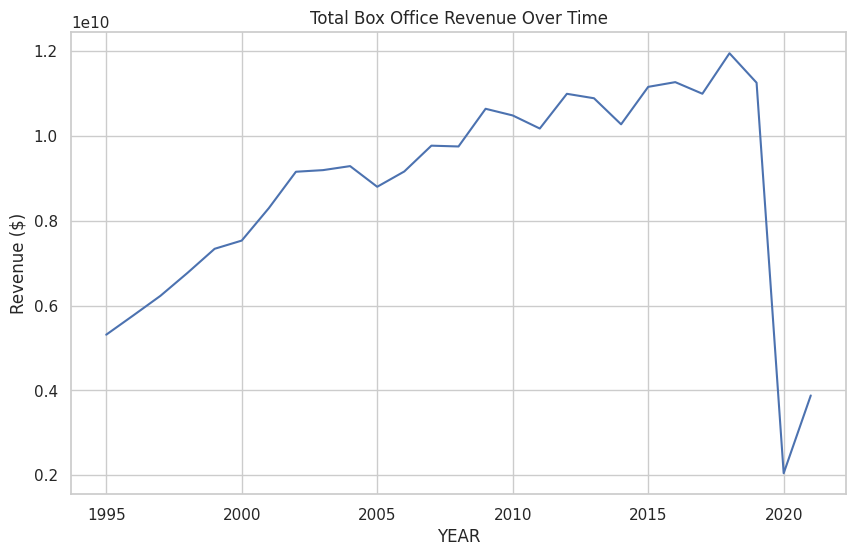

In [16]:
# Exploratory Data Analysis
plt.figure(figsize=(10,6))
sns.lineplot(data=annual_sales, x='YEAR', y='TOTAL BOX OFFICE')
plt.title('Total Box Office Revenue Over Time')
plt.ylabel('Revenue ($)')
plt.show()

In [17]:
# Modeling: Predict Total Box Office from Ticket Price and Tickets Sold
X = annual_sales[['AVERAGE TICKET PRICE', 'TICKETS SOLD']]
y = annual_sales['TOTAL BOX OFFICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('R² Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R² Score: 0.9680052306347173
MAE: 236297459.56435838


In [35]:
genre_summary['num_movies'] = genre_summary['num_movies'].replace(',', '', regex=True).astype(int)


=== Cleaned genre_summary ===
              GENRES  num_movies   total_gross
0             Action        1098  4.933997e+10
1          Adventure        1102  6.452954e+10
2       Black Comedy         213  2.185433e+09
3             Comedy        2418  3.368799e+10
4        Documentary        2415  2.519513e+09
5              Drama        5479  3.558618e+10
6             Horror         716  1.343038e+10
7            Musical         201  4.293988e+09
8    Romantic Comedy         630  1.048012e+10
9  Thriller/Suspense        1186  1.981020e+10


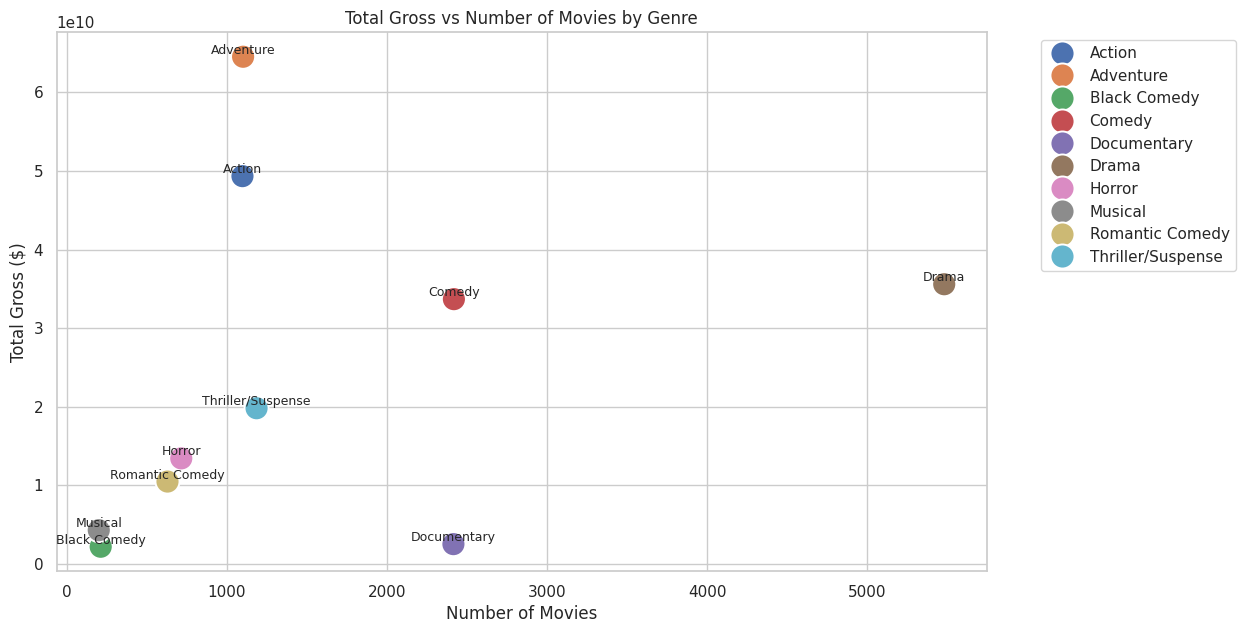

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure you’ve already built genre_summary as before

# Clean num_movies column if needed (remove commas, convert to int)
genre_summary['num_movies'] = genre_summary['num_movies'].replace(',', '', regex=True).astype(int)

# Print to check
print("\n=== Cleaned genre_summary ===")
print(genre_summary)

# Plot: Total Gross vs Number of Movies (Linear Scale)
plt.figure(figsize=(12,7))
sns.scatterplot(data=genre_summary, x='num_movies', y='total_gross', hue='GENRES', s=300)

# Add text labels on each point
for i in range(genre_summary.shape[0]):
    plt.text(
        genre_summary['num_movies'][i],
        genre_summary['total_gross'][i],
        genre_summary['GENRES'][i],
        fontsize=9,
        ha='center',
        va='bottom'
    )

plt.title('Total Gross vs Number of Movies by Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Total Gross ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<ipython-input-42-c4f41dacac01>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_total_sorted, x='GENRES', y='total_gross', palette='viridis')


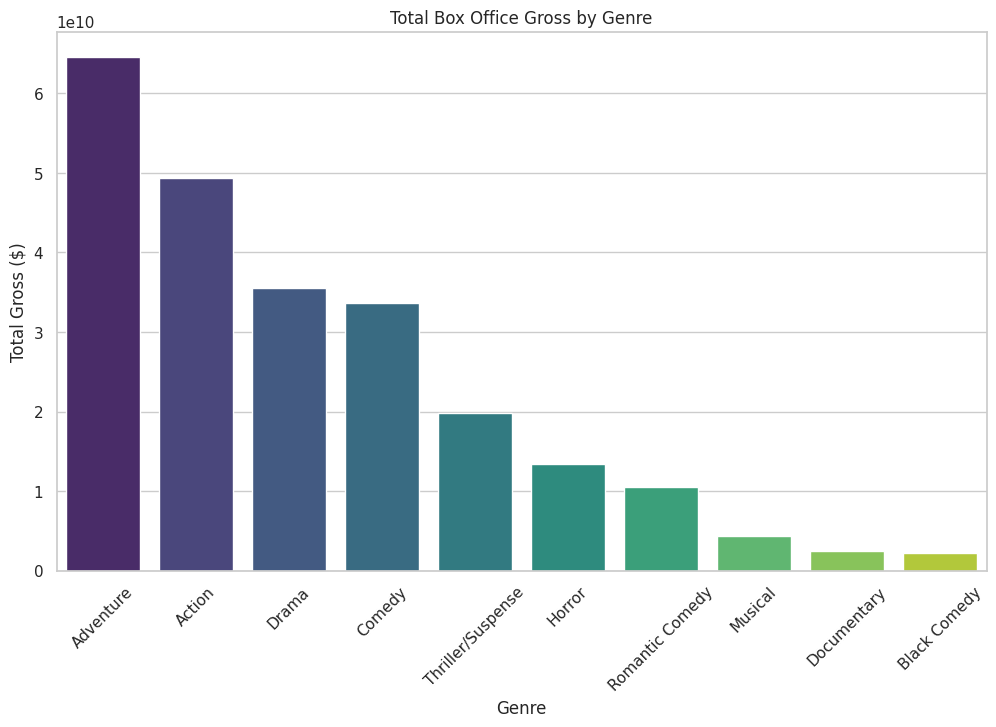

<ipython-input-42-c4f41dacac01>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_avg_sorted, x='GENRES', y='avg_gross_per_movie', palette='plasma')


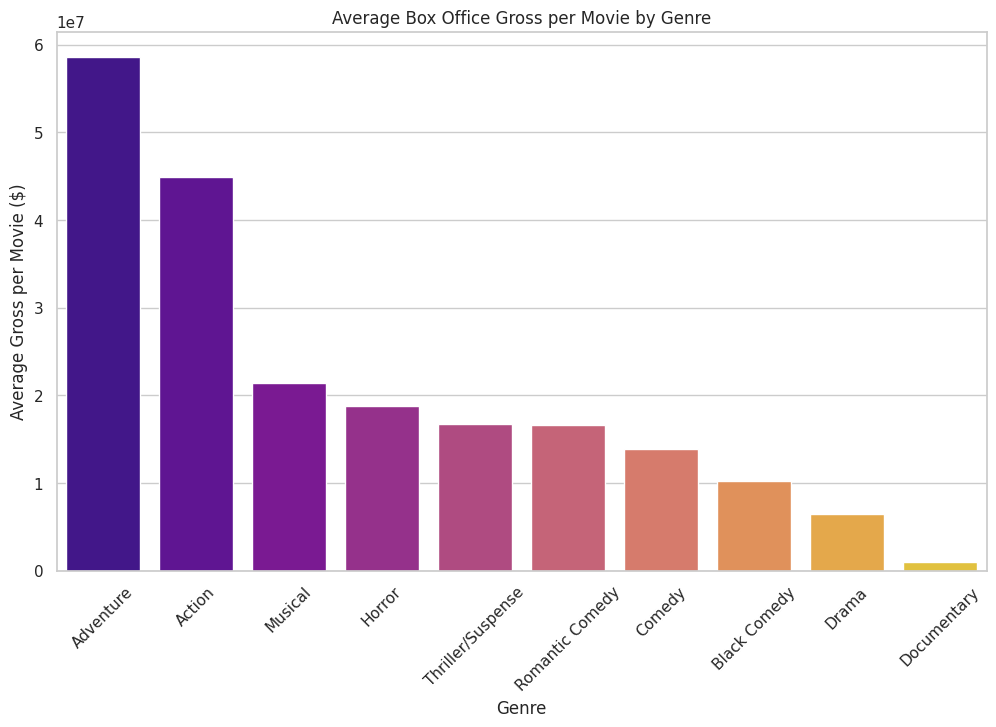

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure num_movies column is clean
genre_summary['num_movies'] = genre_summary['num_movies'].replace(',', '', regex=True).astype(int)

# Calculate average gross per movie
genre_summary['avg_gross_per_movie'] = genre_summary['total_gross'] / genre_summary['num_movies']

# Sort by total gross
genre_total_sorted = genre_summary.sort_values(by='total_gross', ascending=False)

# Plot 1: Total Gross by Genre
plt.figure(figsize=(12,7))
sns.barplot(data=genre_total_sorted, x='GENRES', y='total_gross', palette='viridis')
plt.title('Total Box Office Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Gross ($)')
plt.xticks(rotation=45)
plt.show()

# Sort by average gross per movie
genre_avg_sorted = genre_summary.sort_values(by='avg_gross_per_movie', ascending=False)

# Plot 2: Average Gross per Movie by Genre
plt.figure(figsize=(12,7))
sns.barplot(data=genre_avg_sorted, x='GENRES', y='avg_gross_per_movie', palette='plasma')
plt.title('Average Box Office Gross per Movie by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Gross per Movie ($)')
plt.xticks(rotation=45)
plt.show()


# ✅ Conclusion
- Ticket sales and prices help explain box office performance.
- Regression modeling shows [insert R²] predictive power.
- Genre-based analysis reveals which genres carry more risk (volatility) vs. average returns.
- Further modeling could include production budget, creative type, or distributor as features.